In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import glob

# 1.

In [ ]:
img1 = cv.imread("chestxray1.png")
img2 = cv.imread("HawkesBay.jpg")

In [ ]:
def equihist(img):
    src = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    hist_src,bins_src = np.histogram(src.flatten(),256,[0,256])
    cdf_src = hist_src.cumsum()
    cdf_normalized_src = cdf_src * float(hist_src.max()) / cdf_src.max()
    dist = cv.equalizeHist(src)
    hist_dist,bins_dist = np.histogram(dist.flatten(),256,[0,256])
    cdf_dist = hist_dist.cumsum()
    cdf_normalized_dist = cdf_dist * float(hist_dist.max()) / cdf_dist.max()

    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)
    

    fig.add_subplot(2,2,1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")

    # display the new image
    fig.add_subplot(2,2,2)
    plt.imshow(dist, cmap='gray')
    plt.title("Equalised Image with Opencv Function")

    fig.add_subplot(2,2,3)
    plt.plot(cdf_normalized_src, color = 'b')
    plt.hist(src.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.title("Original Histogram")
    plt.legend(('cdf','histogram'), loc = 'upper left')

    # display the new image
    fig.add_subplot(2,2,4)
    plt.plot(cdf_normalized_dist, color = 'b')
    plt.hist(dist.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.title("Equalised Histogram with Opencv Function")
    plt.legend(('cdf','histogram'), loc = 'upper left')
   
    plt.show(block=True)
    return

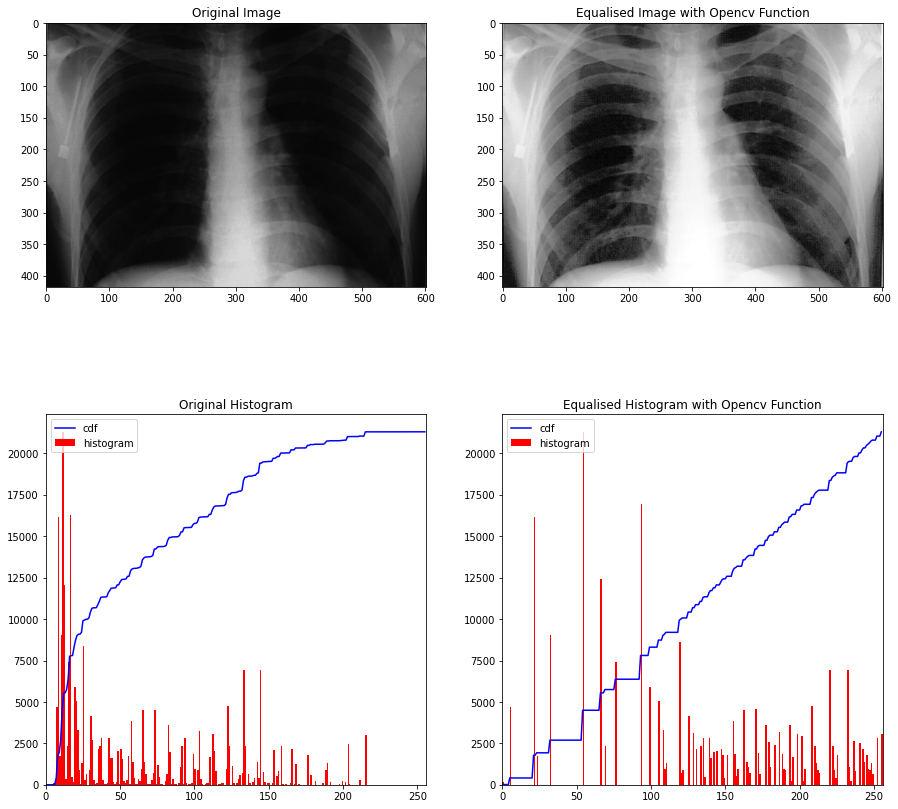

In [ ]:
equihist(img1)

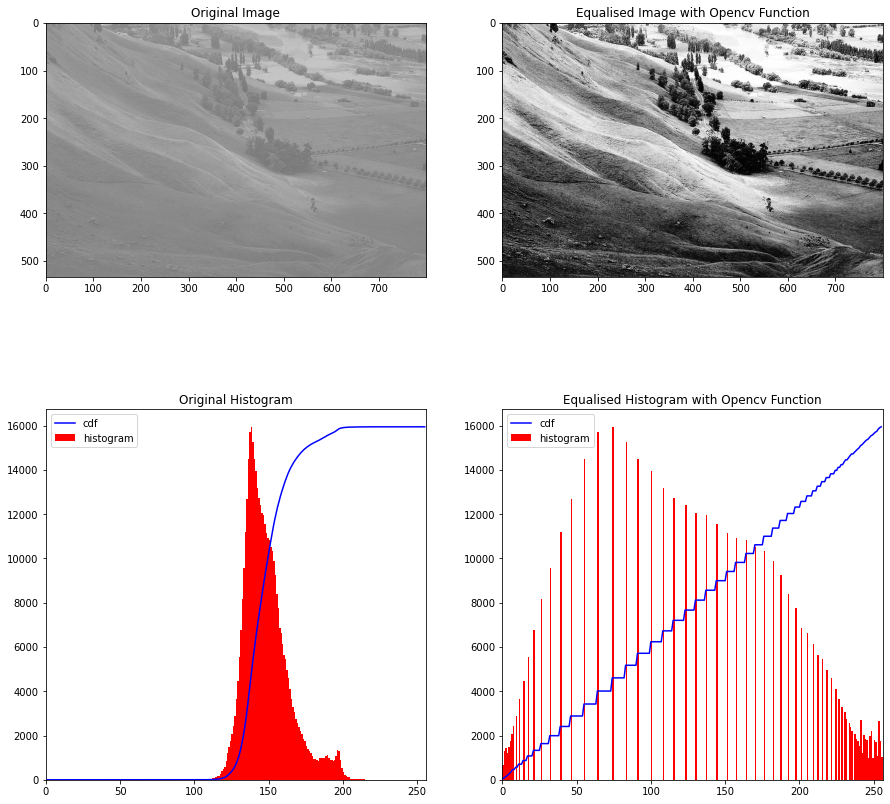

In [ ]:
equihist(img2)

In [ ]:
def equializationhist(img):
    src = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    hist_src,bins_src = np.histogram(src.flatten(),256,[0,256])
    cdf_src = hist_src.cumsum()
    cdf_normalized_src = cdf_src * float(hist_src.max()) / cdf_src.max()

    constant = (255-0)/(src.max()-src.min())
    dist = (src - src.min()) * constant

    # put array back into original shape since we flattened it
    dist = np.reshape(dist, src.shape)


    hist_dist,bins_dist = np.histogram(dist.flatten(),256,[0,256])
    cdf_dist = hist_dist.cumsum()
    cdf_normalized_dist = cdf_dist * float(hist_dist.max()) / cdf_dist.max()


    # set up side-by-side image display
    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)

    fig.add_subplot(2,2,1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")

    # display the new image
    fig.add_subplot(2,2,2)
    plt.imshow(dist, cmap='gray')
    plt.title("Equalised Image")

    fig.add_subplot(2,2,3)
    plt.plot(cdf_normalized_src, color = 'b')
    plt.hist(src.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.title("Original Histogram")
    plt.legend(('cdf','histogram'), loc = 'upper left')

    # display the new image
    fig.add_subplot(2,2,4)
    plt.plot(cdf_normalized_dist, color = 'b')
    plt.hist(dist.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.title("Disturbed Histogram")
    plt.legend(('cdf','histogram'), loc = 'upper left')

    plt.show(block=True)
    return

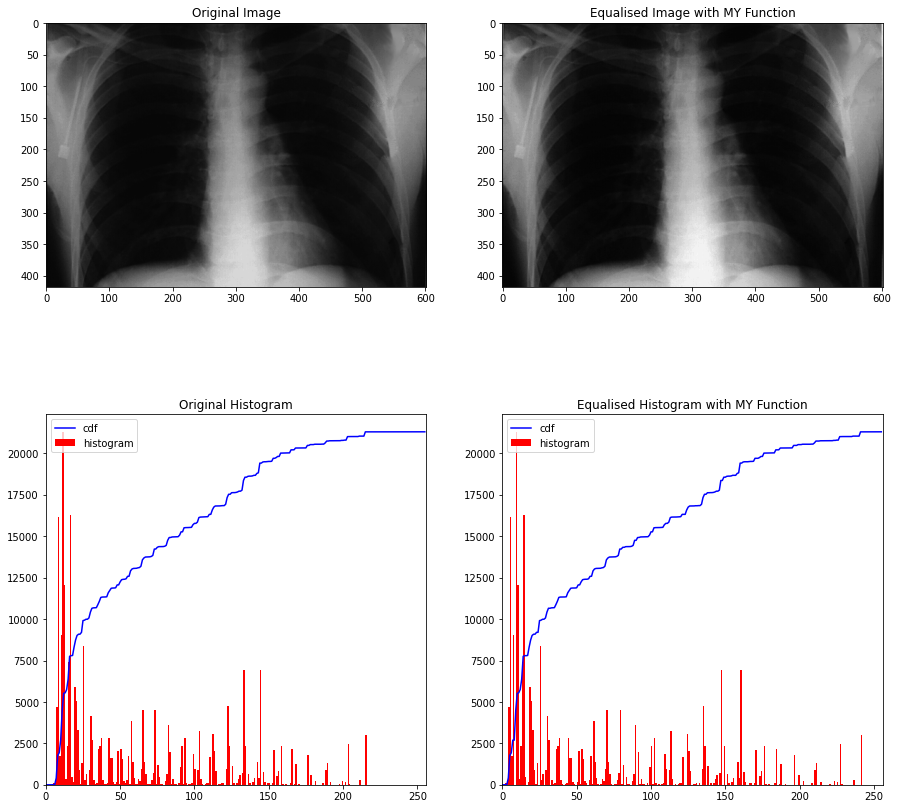

In [ ]:
equializationhist(img1)

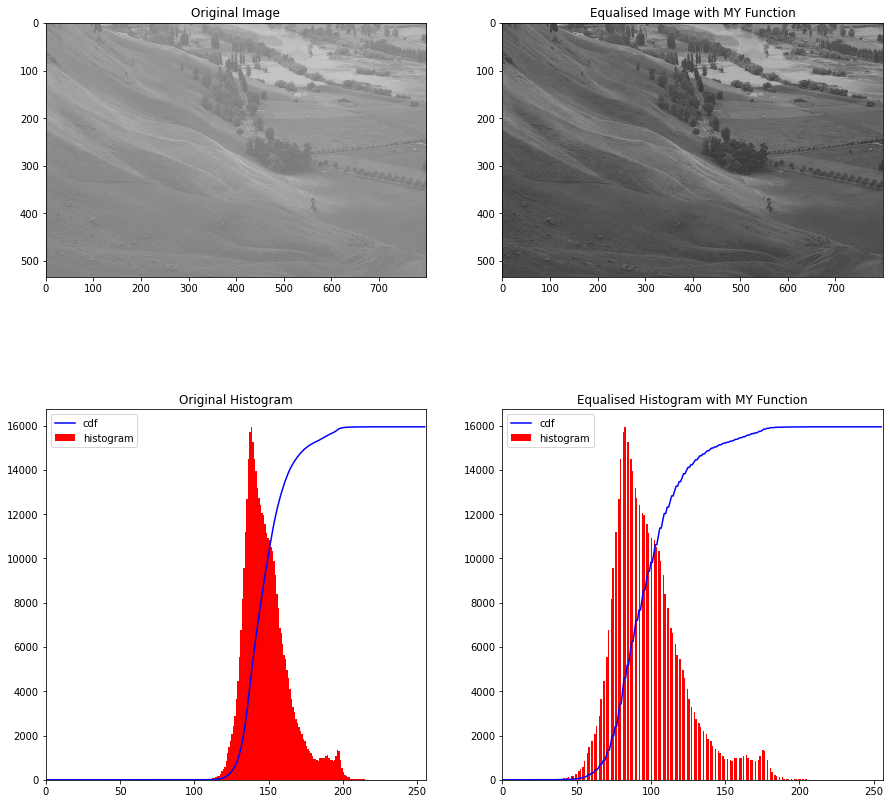

In [ ]:
equializationhist(img2)

#2.

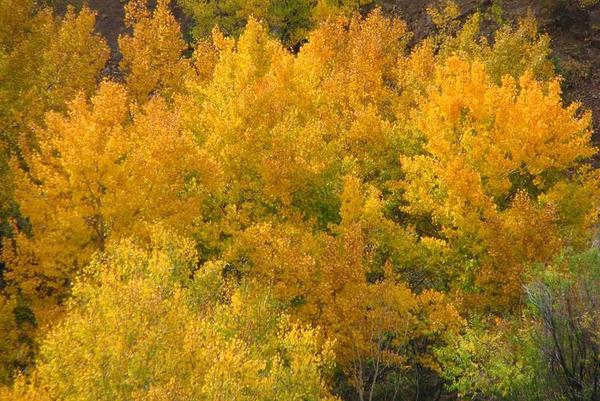

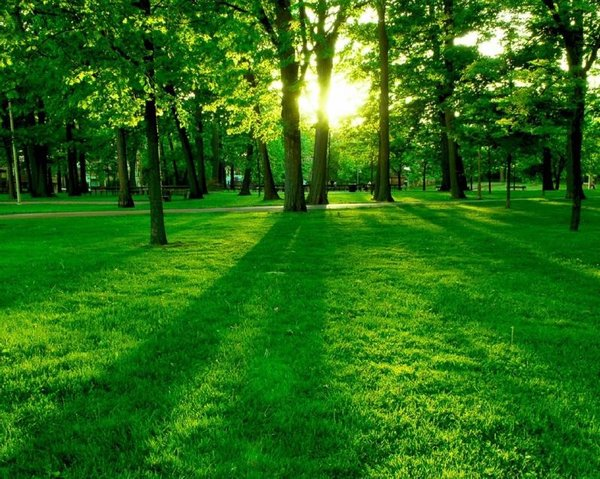

In [ ]:
img1 = cv.imread("image1.jpg")
img2 = cv.imread("image2.jpg")
cv2_imshow(img1)
cv2_imshow(img2)

In [ ]:
def plot_histsrgb(img):
    src = img.copy()
    r, g, b = cv.split(src)
    r1, g1, b1 = cv.equalizeHist(r), cv.equalizeHist(g),cv.equalizeHist(b)
    dist = cv.merge([r1,g1,b1])
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(10)

    fig.add_subplot(4,3,1)
    plt.imshow(r)
    plt.title("red-channel")

    fig.add_subplot(4,3,2)
    plt.hist(r.flatten(), 256, [0,256], color = 'r')
    plt.title("Red channel histogram")


    fig.add_subplot(4,3,3)
    plt.hist(r1.flatten(), 256, [0,256], color = 'r')
    plt.title("Equalized Red channel histogram")


    fig.add_subplot(4,3,4)
    plt.imshow(g)
    plt.title("Green-channel")

    fig.add_subplot(4,3,5)
    plt.hist(g.flatten(), 256, [0,256], color = 'g')
    plt.title("Green channel histogram")

    fig.add_subplot(4,3,6)
    plt.hist(g1.flatten(), 256, [0,256], color = 'g')
    plt.title("Equalized Green channel histogram")

    fig.add_subplot(4,3,7)
    plt.imshow(b)
    plt.title("Blue-channel")

    fig.add_subplot(4,3,8)
    plt.hist(b.flatten(), 256, [0,256], color = 'b')
    plt.title("Blue channel histogram")

    fig.add_subplot(4,3,9)
    plt.hist(b1.flatten(), 256, [0,256], color = 'b')
    plt.title("Equalized Blue channel histogram")


    fig.add_subplot(4,3,10)
    plt.imshow(src)
    plt.title("Original Image")

    fig.add_subplot(4,3,11)
    plt.imshow(dist)
    plt.title("after equalizing each channel")

    plt.show()
    return

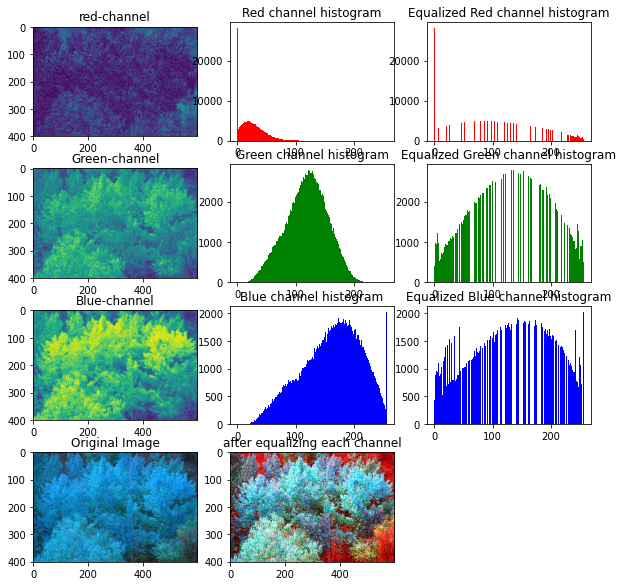

In [ ]:
plot_histsrgb(img1)

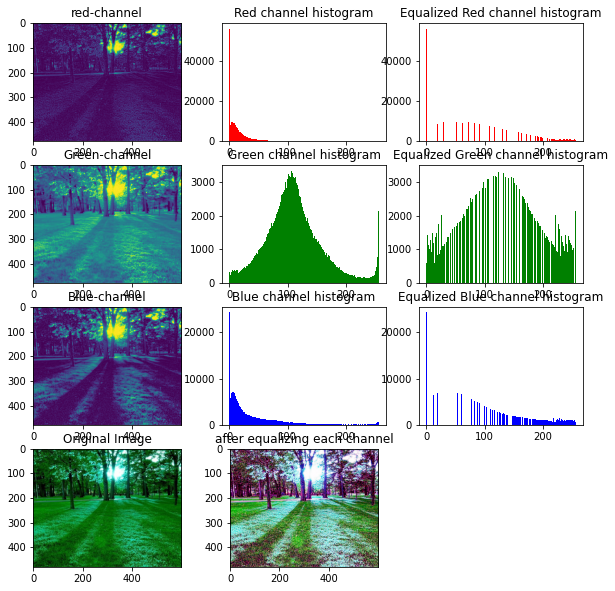

In [ ]:
plot_histsrgb(img2)

#3. 

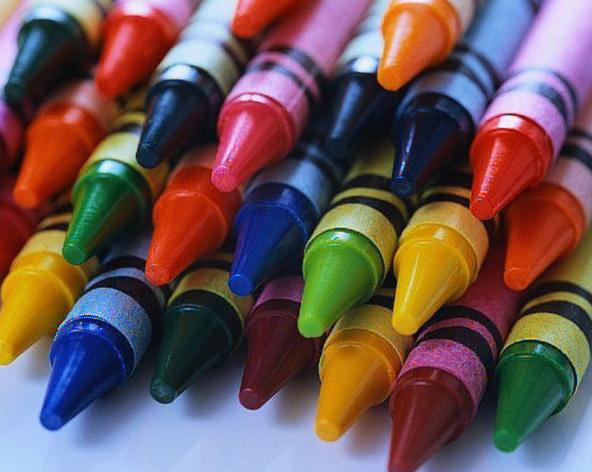

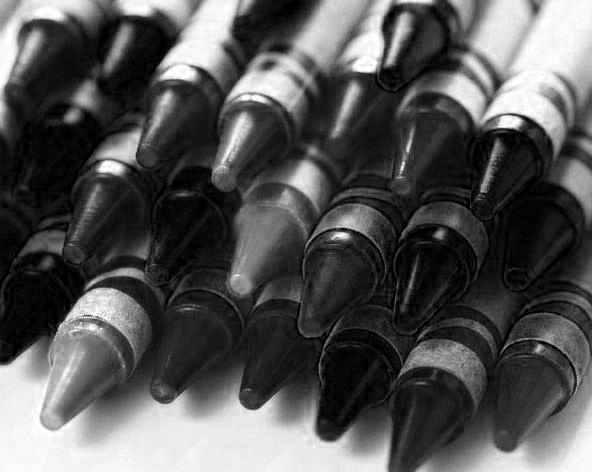

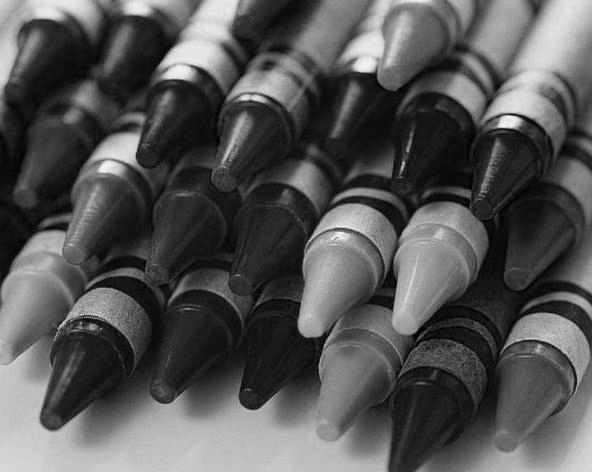

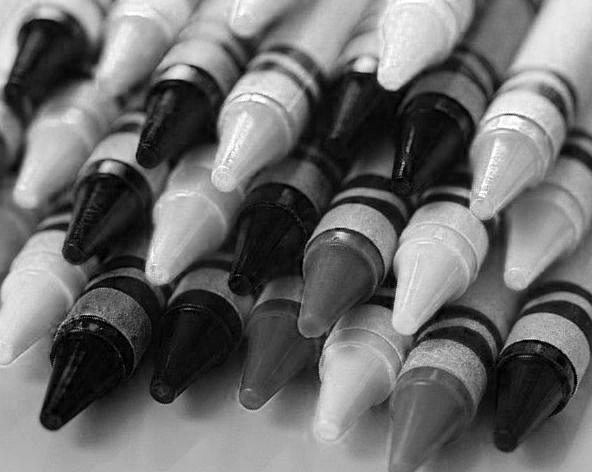

In [ ]:
img = cv.imread("crayons.jpg")
r,g,b = cv.split(img)
cv2_imshow(img)
cv2_imshow(r)
cv2_imshow(g)
cv2_imshow(b)


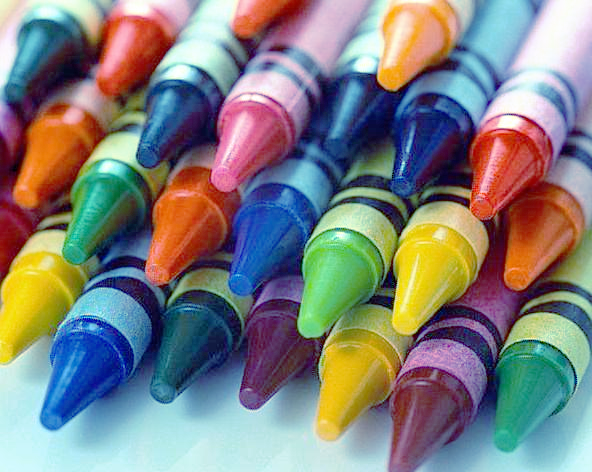

In [ ]:
crayon_dist = cv.merge([cv.equalizeHist(r),cv.equalizeHist(g), cv.equalizeHist(b)])
cv2_imshow(crayon_dist)

In [ ]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h,s,v = cv.split(hsv)
dist_v = cv.equalizeHist(v)
hsv_dist = cv.merge([h,s,dist_v])
crayon_hsv_dist = cv.cvtColor(hsv_dist, cv.COLOR_HSV2BGR)

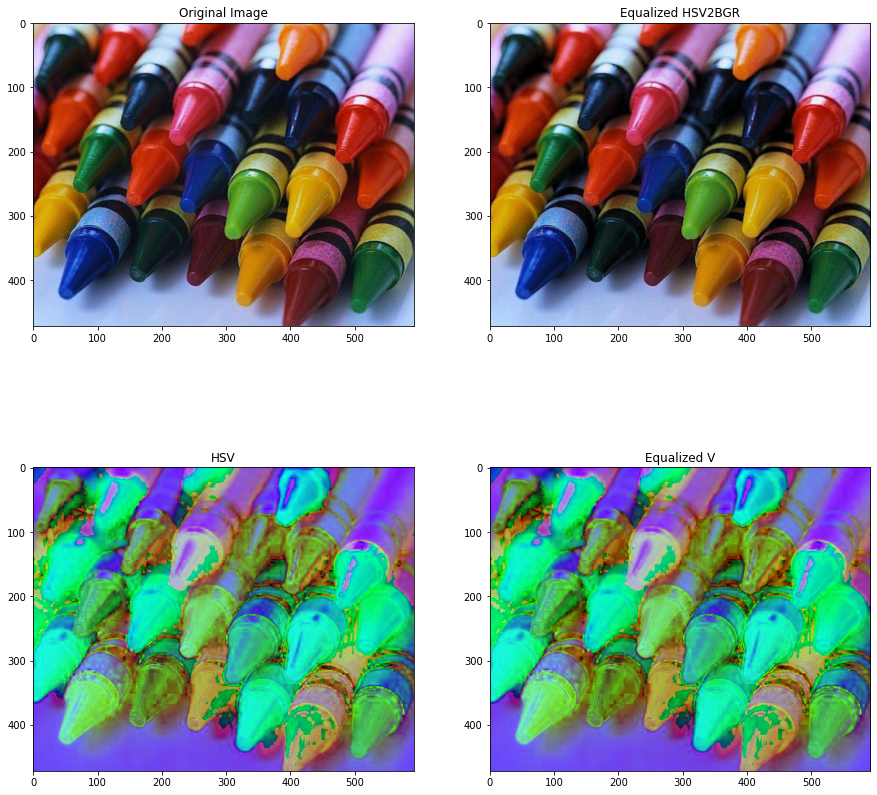

In [ ]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)


fig.add_subplot(2,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original Image")

# display the new image
fig.add_subplot(2,2,2)
plt.imshow(cv.cvtColor(crayon_hsv_dist, cv.COLOR_BGR2RGB))
plt.title("Equalized HSV2BGR")


fig.add_subplot(2,2,3)
plt.imshow(hsv)
plt.title("HSV")

# display the new image
fig.add_subplot(2,2,4)
plt.imshow(hsv_dist)
plt.title("Equalized V")

plt.show(block=True)

#4.

In [ ]:
from skimage import data
img = data.astronaut()
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

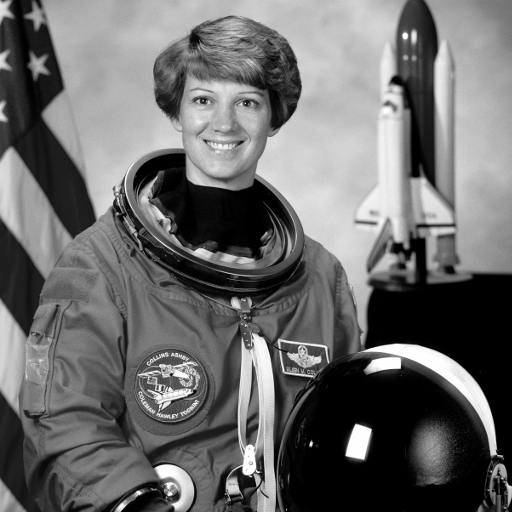

In [ ]:
cv2_imshow(img)

In [ ]:
def swahe(img,k = 9, stride=2):
    h,w = img.shape
    src = img.copy()
    startx, starty,endx, endy = 0,0,k,k
    while endx<=w:
        starty,endy = 0,k
        while endy<h:
            temp = cv.equalizeHist(src[startx:endx, starty:endy])
            src[startx:endx, starty:endy] = temp
            endy+=stride
            starty+=stride
        endx+=stride
        startx+=stride
    return src

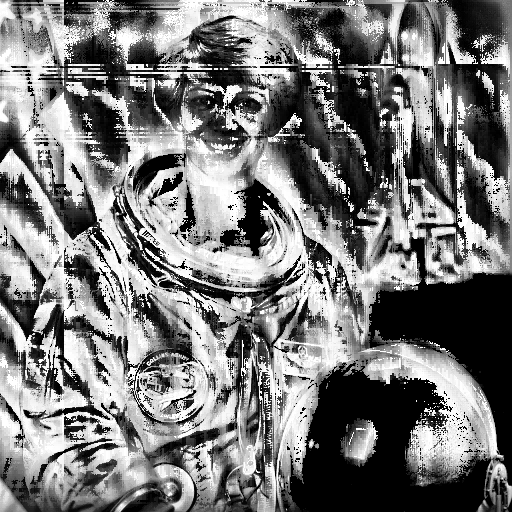

In [ ]:
dist = swahe(img,k=64)
cv2_imshow(dist)

In [ ]:
def blockahe(img, block_number):
    h,w = img.shape
    src = img.copy()
    kh = int(h/block_number)
    kw = int(w/block_number) 
    startx, starty,endx, endy = 0,0,kw,kh
    while endx<=w:
        starty,endy = 0,kh
        while endy<h:
            temp = cv.equalizeHist(src[startx:endx, starty:endy])
            src[startx:endx, starty:endy] = temp
            endy+=kh
            starty+=kh
        endx+=kw
        startx+=kw
    return src

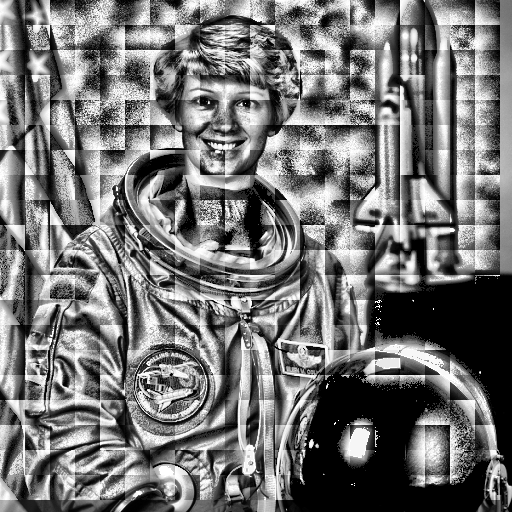

In [ ]:
dist2 = blockahe(img,20)
cv2_imshow(dist2)

In [ ]:
clahe = cv.createCLAHE(clipLimit = 5)
final_img1 = clahe.apply(img) + 30

In [ ]:
clahe = cv.createCLAHE(clipLimit = 10)
final_img2 = clahe.apply(img) + 30

In [ ]:
clahe = cv.createCLAHE(clipLimit = 15)
final_img3 = clahe.apply(img) + 30

In [ ]:
clahe = cv.createCLAHE(clipLimit = 20)
final_img4 = clahe.apply(img) + 30

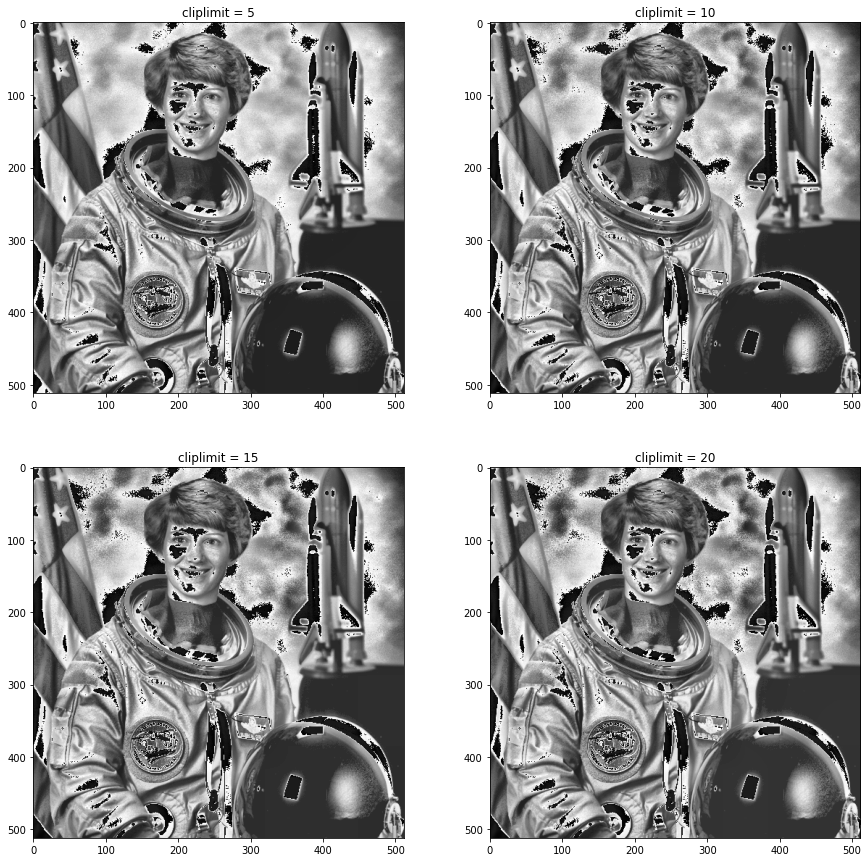

In [ ]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(2,2,1)
plt.imshow(final_img1,cmap='gray')
plt.title("cliplimit = 5")

fig.add_subplot(2,2,2)
plt.imshow(final_img2, cmap='gray')
plt.title("cliplimit = 10")

fig.add_subplot(2,2,3)
plt.imshow(final_img3, cmap='gray')
plt.title("cliplimit = 15")

fig.add_subplot(2,2,4)
plt.imshow(final_img4, cmap='gray')
plt.title("cliplimit = 20")


plt.show(block = True)

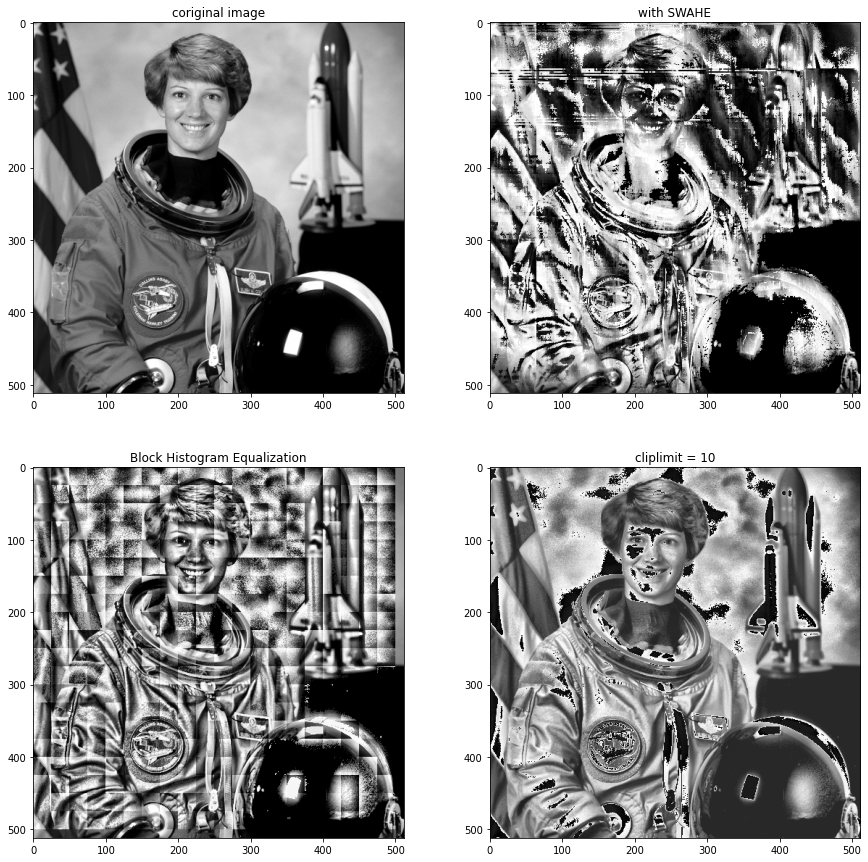

In [ ]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title("coriginal image")

fig.add_subplot(2,2,2)
plt.imshow(dist, cmap='gray')
plt.title("with SWAHE")

fig.add_subplot(2,2,3)
plt.imshow(dist2, cmap='gray')
plt.title("Block Histogram Equalization")

fig.add_subplot(2,2,4)
plt.imshow(final_img2, cmap='gray')
plt.title("cliplimit = 10")


plt.show(block = True)

#5.

Doing it with HawkesBay.jpg

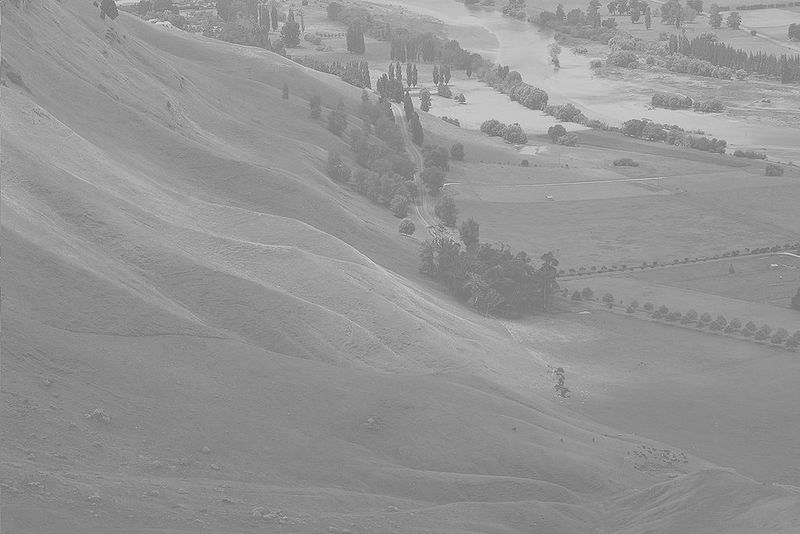

In [ ]:
img = cv.imread("HawkesBay.jpg",cv.COLOR_BGR2GRAY)
cv2_imshow(img)

In [ ]:
img.shape

(534, 800)

## highlight a particular range and set the rest to zero

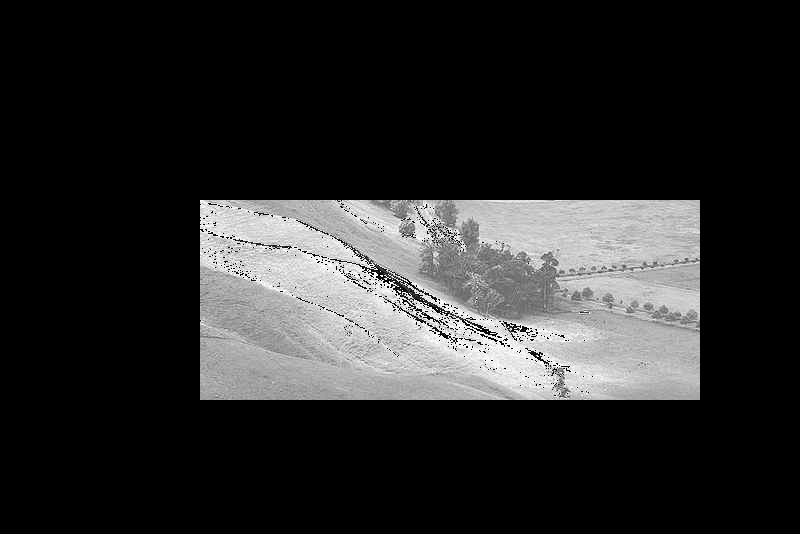

In [ ]:
dist1 = np.zeros(img.shape)
dist1[200:400,200:700] = img[200:400,200:700]*3
cv2_imshow(dist1)

## highlight a particular range and leave the rest unchanged.

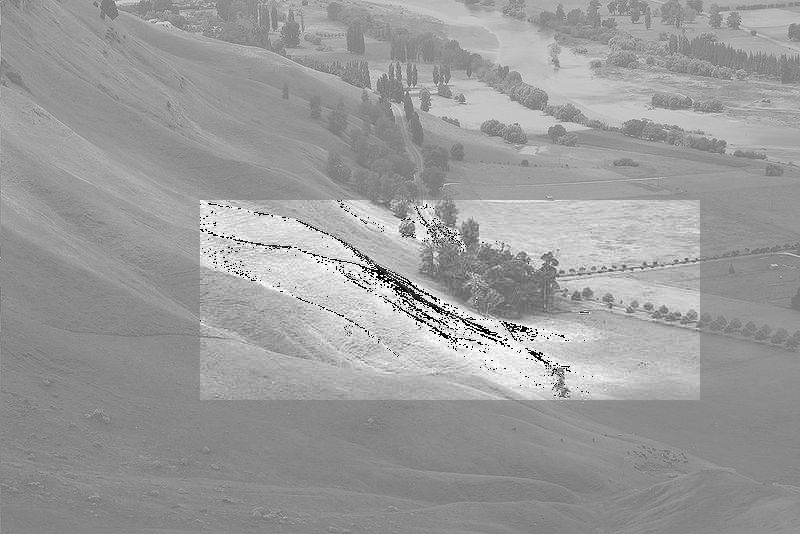

In [ ]:
dist2 = img
dist2[200:400,200:700] = img[200:400,200:700]*3
cv2_imshow(dist2)

#6.

In [ ]:
img = data.astronaut()
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

bitlist = list()
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         bitlist.append(np.binary_repr(img[i][j] ,width=8))

eight_bit_img = (np.array([int(i[0]) for i in bitlist],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in bitlist],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in bitlist],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in bitlist],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in bitlist],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in bitlist],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in bitlist],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in bitlist],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])

In [ ]:
len(bits)

7

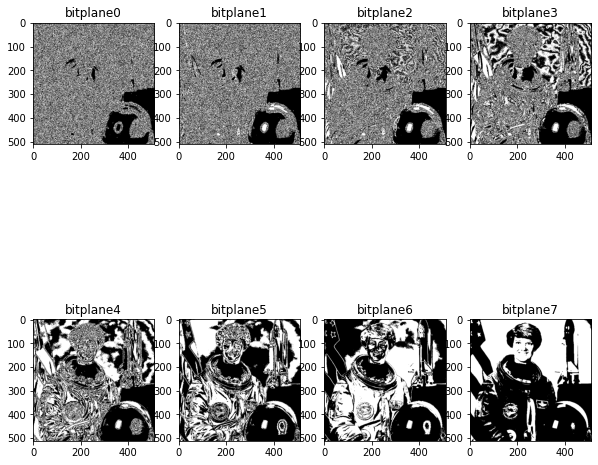

In [ ]:
bits = [one_bit_img,two_bit_img,three_bit_img,four_bit_img,five_bit_img,six_bit_img,seven_bit_img,eight_bit_img]

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
for i in range(8):
    fig.add_subplot(2,4,i+1)
    plt.imshow(bits[i],cmap='gray')
    plt.title("bitplane"+str(i))
    
plt.show(block = True)

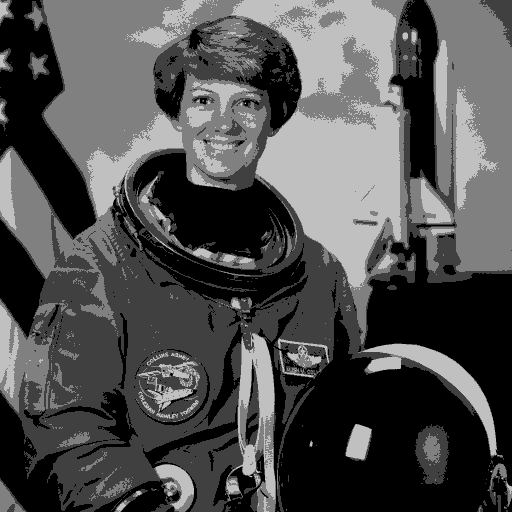

In [ ]:
new = bits[7]+bits[6]
cv2_imshow(new)